In [1]:
filename = '/media/public/anemos/353001_UL__Canyon_Tower_1_meas_2018.06.22-2018.11.15.txt'

In [2]:
from fieldanalysis import readers
from fieldanalysis import filters
import numpy as np
import pandas as pd
from fieldanalysis import plotters as plot
from fieldanalysis import analyses as an
from matplotlib import pylab as plt
%matplotlib notebook


<b> - Define all pairs for site 353001 in a list and create reader object to read data</b>

In [3]:
pairs = [['Ch1','Ch5'],['Ch2','Ch6'],['Ch7','Ch8'],['Ch3','Ch10'],['Ch9','Ch4'],['Ch11','Ch12']]
reader = readers.SymPro(filename)

<b> - Find fieldnames for all averages and stdevs for anemometer. Find also fieldname for vane and temperature sensor using the get_fieldname method of the reader

In [4]:
#define all pairs, find vane and temp
fieldnamePairs = []
for pair in pairs:
    tmp1 = reader.get_fieldname(pair[0],'Avg')
    tmp2 = reader.get_fieldname(pair[1],'Avg')
    fieldnamePairs.append([tmp1,tmp2])

fieldnamePairsSD = []
for pair in pairs:
    tmp1 = reader.get_fieldname(pair[0],'SD')
    tmp2 = reader.get_fieldname(pair[1],'SD')
    fieldnamePairsSD.append([tmp1,tmp2])
    
vaneAvg = reader.get_fieldname('Ch14','Avg')
vaneSD = reader.get_fieldname('Ch14','SD')
temp = reader.get_fieldname('Ch16','Avg')
    

<b>
* Create a filter object and generate general wind speed filter as well as icing filter
* Create an analysis object and plotter object
* Apply filter to data and plot ratio plots for all.

<IPython.core.display.Javascript object>


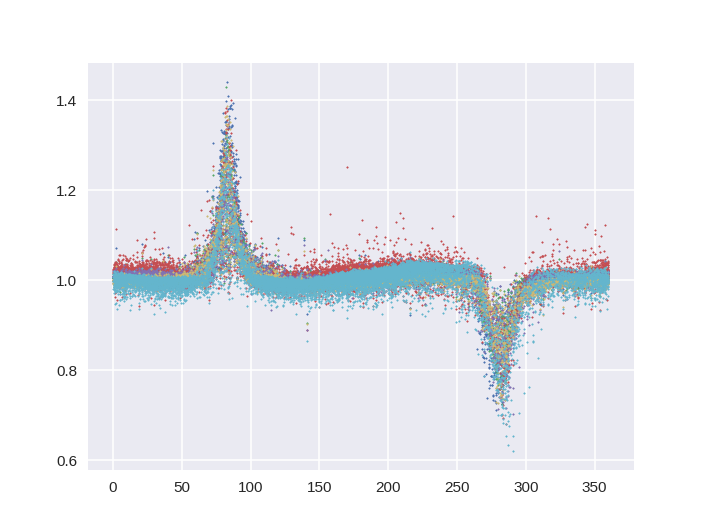

[None, None, None, None, None, None]

In [5]:
Filter = filters.ClassicFilters(reader)
Filter.generate_windspeed_filter('Ch1_Anem_58.00m_E_Avg_m/s')
Filter.generate_windspeed_filter('Ch5_Anem_58.00m_W_Avg_m/s')
Filter.generate_icing_filter(temp,vaneSD)
reader.apply_filters(Filter)
ca = an.ClassicAnalyses(reader)
vane = reader.get_data(vaneAvg)
plotter = plot.ClassicPlotter(ca)
ratios = [ca.compute_ws_ratio(pair[0],pair[1]) for pair in fieldnamePairs]
[plotter.plot_scatter(vane,ratio,False) for ratio in ratios]

* Generate a best sector filter
* Remove filters from the reader to retrieve unfiltered data
* Generate a windspeed filter for each anemometer, and apply filter to reader
* compute wind speed ratios
* plot ratio vs vane with filters
* compute TI and bias as well

<IPython.core.display.Javascript object>


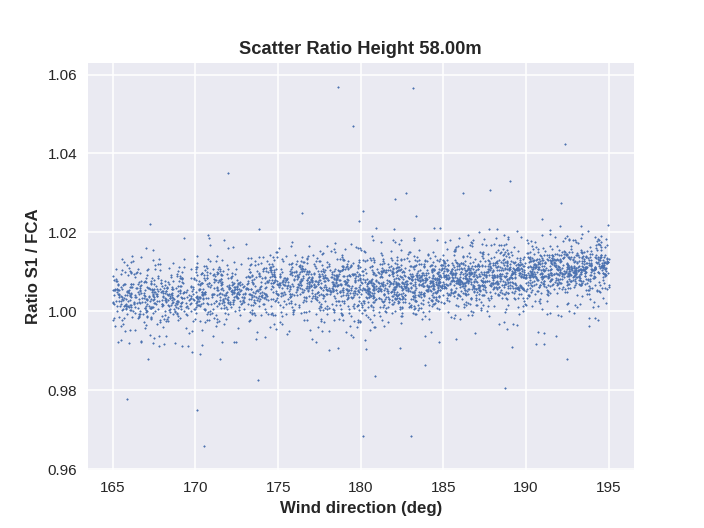

Channel 1 S.N. 94050000022 and Channel 5 S.N. 08177585


<IPython.core.display.Javascript object>


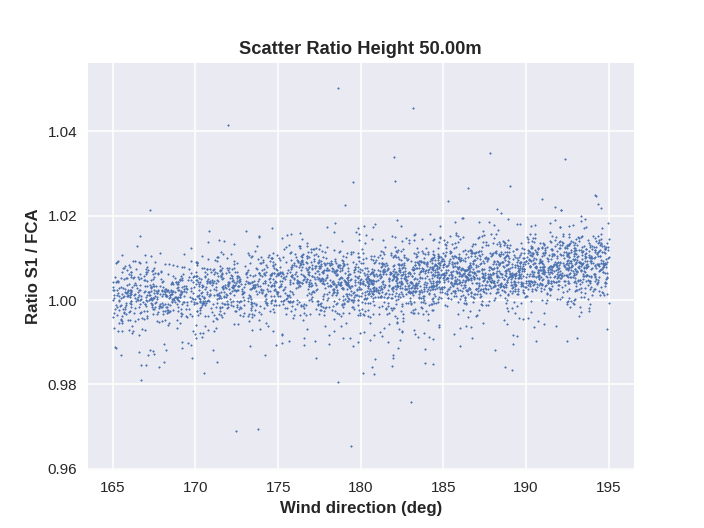

Channel 2 S.N. 94050000009 and Channel 6 S.N. 08177596


<IPython.core.display.Javascript object>


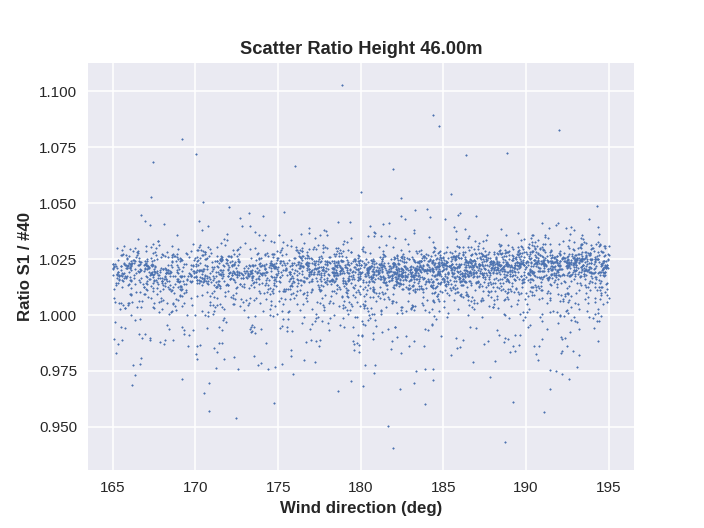

Channel 7 S.N. 94050000003 and Channel 8 S.N. 179500307368


<IPython.core.display.Javascript object>


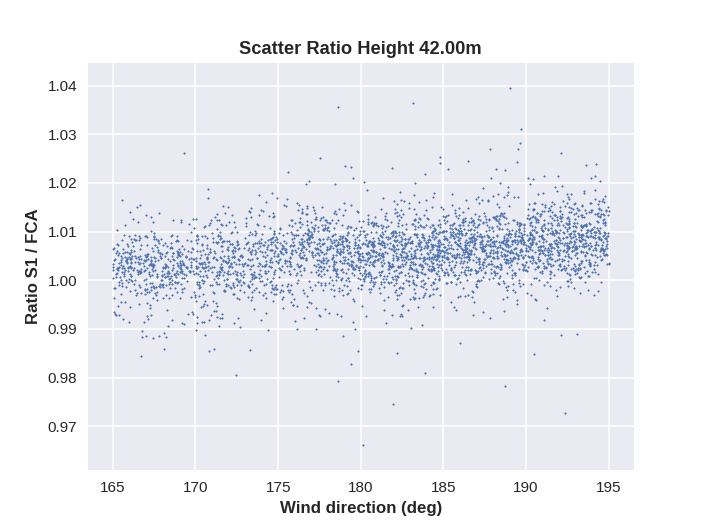

Channel 3 S.N. 94050000013 and Channel 10 S.N. 08177608


<IPython.core.display.Javascript object>


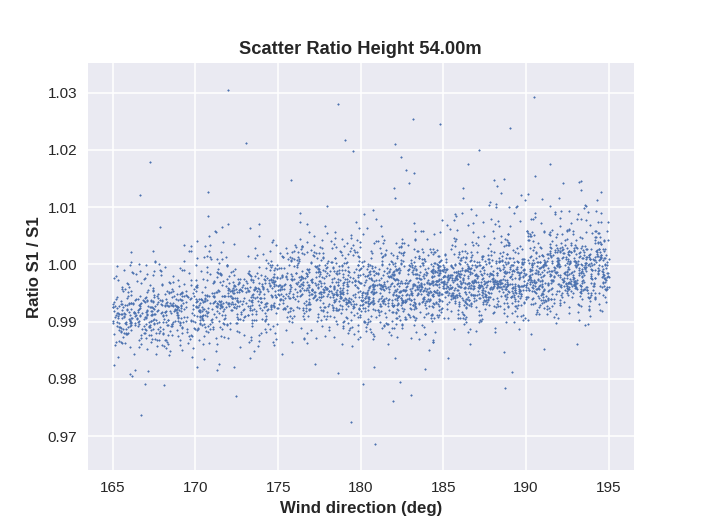

Channel 9 S.N. 94050000014 and Channel 4 S.N. 94050000032


<IPython.core.display.Javascript object>


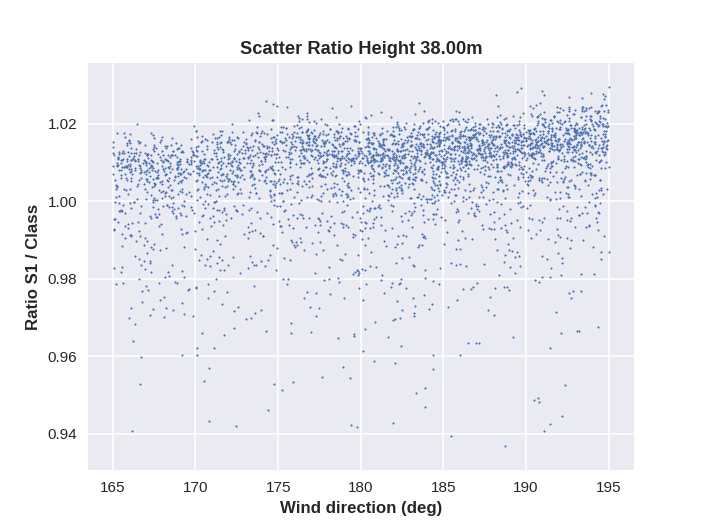

Channel 11 S.N. 94050000012 and Channel 12 S.N. 596600008817


In [6]:
ratios = []
TI = []
bias = []
Filter.generate_best_sector_filter(vaneAvg,[80,280])
for i,pair in enumerate(fieldnamePairs):
    reader.remove_filters()
    channels = [int(pairs[i][0][2:]),int(pairs[i][1][2:])]
    brands = [reader.get_info(ch)['brand'][1] for ch in channels]
    sNumbers = [reader.get_info(ch)['sNumber'] for ch in channels]
    height = reader.get_info(channels[0])['height']
    Filter.clear_filter('windspeed')
    Filter.generate_windspeed_filter(pair[0])
    Filter.generate_windspeed_filter(pair[1])
    reader.apply_filters(Filter)
    ratio = ca.compute_ws_ratio(pair[0],pair[1])
    vane = reader.get_data(vaneAvg)
    ratios.append(ratio)
    title = 'Scatter Ratio Height %sm'%height

    plotter.plot_scatter(vane,ratio,title = title)
    plt.xlabel('Wind direction (deg)',fontweight='bold')
    plt.ylabel("Ratio %s / %s"%(brands[0],brands[1]),fontweight='bold')
    print("Channel %d S.N. %s and Channel %d S.N. %s" %(channels[0],sNumbers[0],channels[1],sNumbers[1]))
    
    #compute TI and Bias
    TI.append(ca.compute_TI(pair[1],fieldnamePairsSD[i][1]))
    bias.append(ca.compute_bias(pair[0],pair[1]))



<b>Generate monthly ratio plots

In [7]:
monthlyRatios = [ratio.resample('M').mean() for ratio in ratios]

<IPython.core.display.Javascript object>


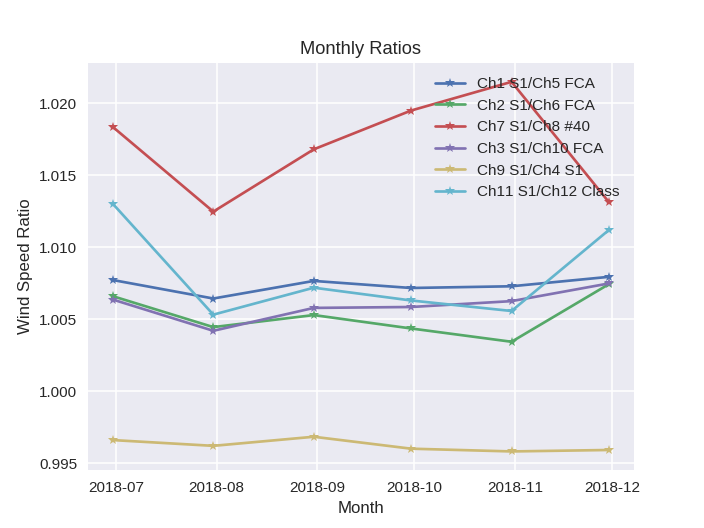

Channel 1 S.N. 94050000022 and Channel 5 S.N. 08177585 -- Height 58.00m
Channel 2 S.N. 94050000009 and Channel 6 S.N. 08177596 -- Height 50.00m
Channel 7 S.N. 94050000003 and Channel 8 S.N. 179500307368 -- Height 46.00m
Channel 3 S.N. 94050000013 and Channel 10 S.N. 08177608 -- Height 42.00m
Channel 9 S.N. 94050000014 and Channel 4 S.N. 94050000032 -- Height 54.00m
Channel 11 S.N. 94050000012 and Channel 12 S.N. 596600008817 -- Height 38.00m


In [8]:
import matplotlib
plt.figure()
for i in range(len(pairs)):
    channels = [int(pairs[i][0][2:]),int(pairs[i][1][2:])]
    brands = [reader.get_info(ch)['brand'][1] for ch in channels]
    sNumbers = [reader.get_info(ch)['sNumber'] for ch in channels]
    label = pairs[i][0] + ' ' + brands[0] +'/'+ pairs[i][1] + ' ' + brands[1]
    plt.plot(monthlyRatios[i],'*-',label=label)
    height = reader.get_info(channels[0])['height']
    print("Channel %d S.N. %s and Channel %d S.N. %s -- Height %sm" %(channels[0],sNumbers[0],channels[1],sNumbers[1],height))
    
plt.title('Monthly Ratios')
plt.xlabel('Month')
plt.ylabel('Wind Speed Ratio')
plt.legend()





<IPython.core.display.Javascript object>


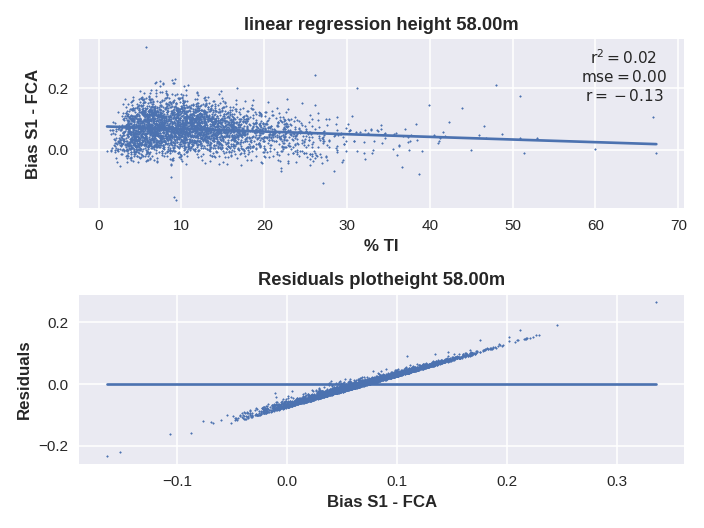

Channel 1 S.N. 94050000022 and Channel 5 S.N. 08177585


<IPython.core.display.Javascript object>


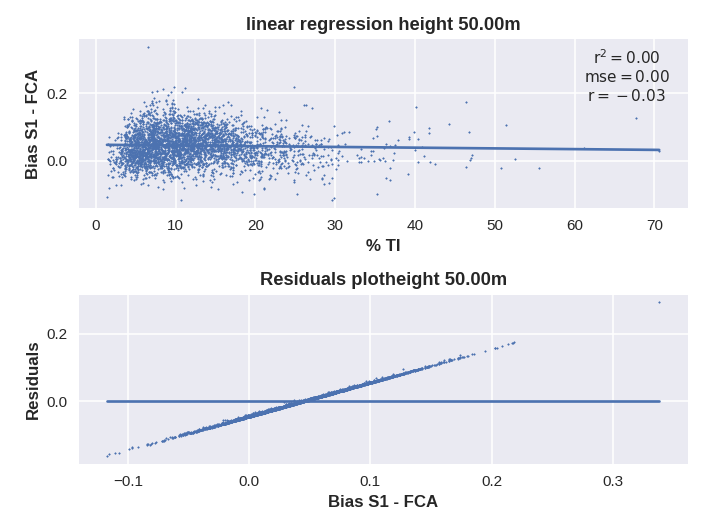

Channel 2 S.N. 94050000009 and Channel 6 S.N. 08177596


<IPython.core.display.Javascript object>


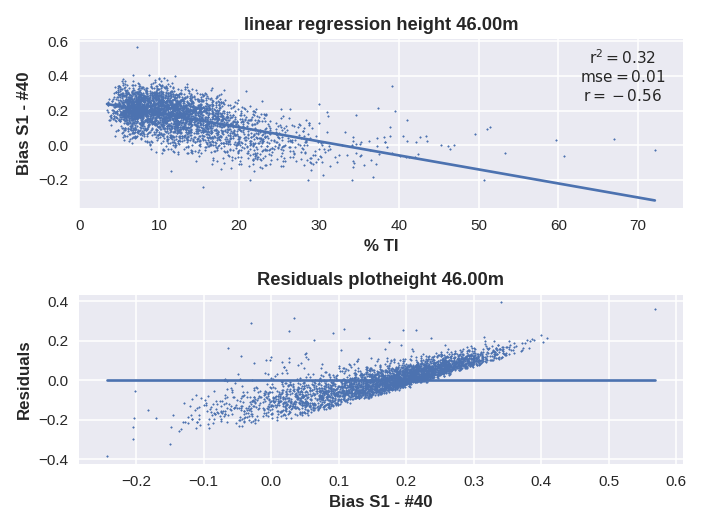

Channel 7 S.N. 94050000003 and Channel 8 S.N. 179500307368


<IPython.core.display.Javascript object>


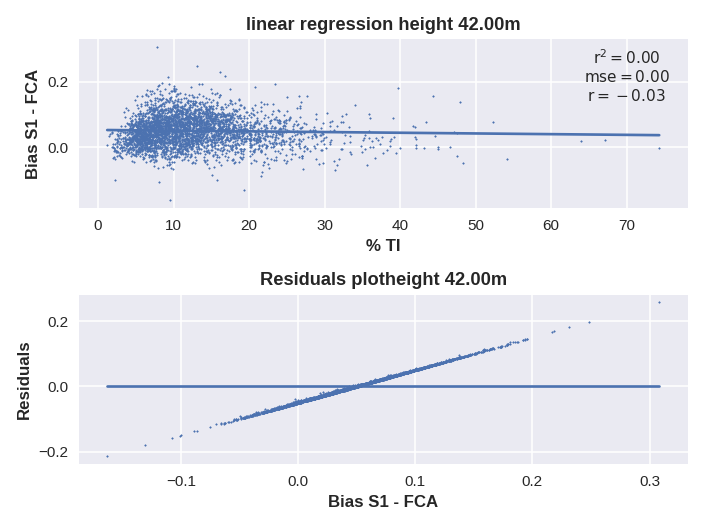

Channel 3 S.N. 94050000013 and Channel 10 S.N. 08177608


<IPython.core.display.Javascript object>


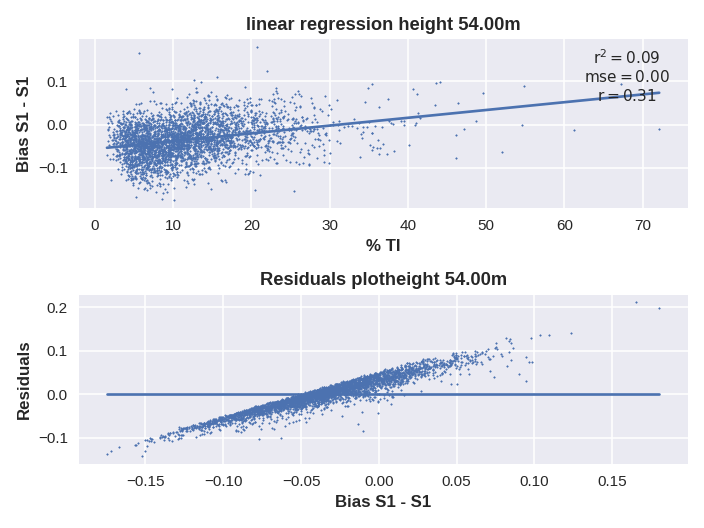

Channel 9 S.N. 94050000014 and Channel 4 S.N. 94050000032


<IPython.core.display.Javascript object>


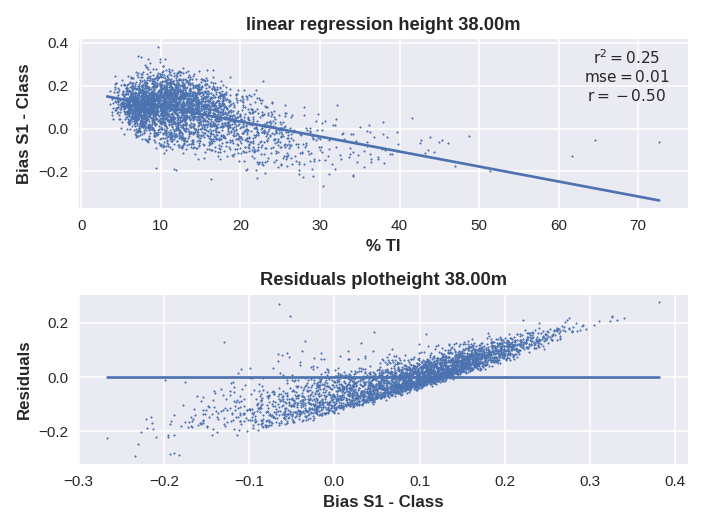

Channel 11 S.N. 94050000012 and Channel 12 S.N. 596600008817


In [17]:
for i,pair in enumerate(fieldnamePairs):
    channels = [int(pairs[i][0][2:]),int(pairs[i][1][2:])]
    brands = [reader.get_info(ch)['brand'][1] for ch in channels]
    sNumbers = [reader.get_info(ch)['sNumber'] for ch in channels]
    height = reader.get_info(channels[0])['height']
    title = 'height %sm'%height
    ylabel = 'Bias %s - %s'%(brands[0],brands[1])
    plotter.plot_linear_regression(TI[i],bias[i],readData=False,title=title,xlabel='% TI',ylabel=ylabel)
    print("Channel %d S.N. %s and Channel %d S.N. %s" %(channels[0],sNumbers[0],channels[1],sNumbers[1]))


In [10]:
a = reader.get_fieldnames()

In [11]:
analog = reader.get_fieldname('Ch21','Avg')

In [12]:
startDate = '2018-07-24 23:00:00'
endDate = '2018-11-15 16:00:00'

In [13]:
analogSensor = reader.get_timeseries(analog,startDate,endDate)

<IPython.core.display.Javascript object>


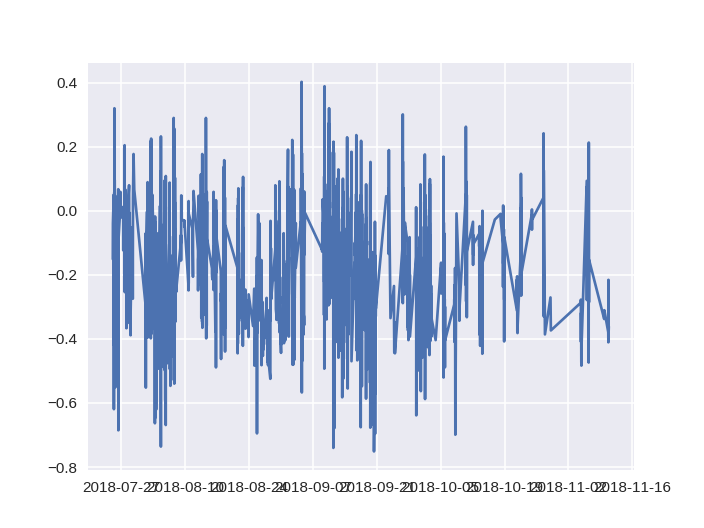

In [14]:
plt.figure()
plt.plot(analogSensor,'')

<IPython.core.display.Javascript object>


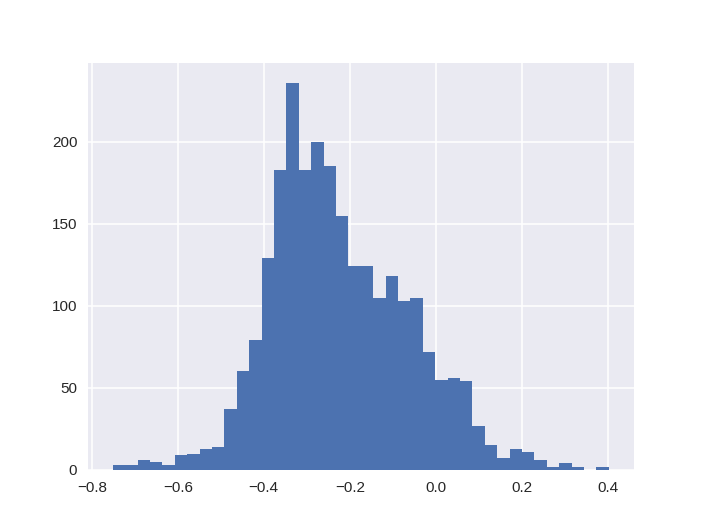

(array([   3.,    3.,    6.,    5.,    3.,    9.,   10.,   13.,   14.,
          37.,   60.,   79.,  129.,  183.,  236.,  183.,  200.,  185.,
         155.,  124.,  124.,  105.,  118.,  103.,  105.,   72.,   55.,
          56.,   54.,   27.,   15.,    7.,   13.,   11.,    6.,    2.,
           4.,    2.,    0.,    2.]),
 array([-0.75119  , -0.7223509, -0.6935118, -0.6646727, -0.6358336,
        -0.6069945, -0.5781554, -0.5493163, -0.5204772, -0.4916381,
        -0.462799 , -0.4339599, -0.4051208, -0.3762817, -0.3474426,
        -0.3186035, -0.2897644, -0.2609253, -0.2320862, -0.2032471,
        -0.174408 , -0.1455689, -0.1167298, -0.0878907, -0.0590516,
        -0.0302125, -0.0013734,  0.0274657,  0.0563048,  0.0851439,
         0.113983 ,  0.1428221,  0.1716612,  0.2005003,  0.2293394,
         0.2581785,  0.2870176,  0.3158567,  0.3446958,  0.3735349,
         0.402374 ]),
 <a list of 40 Patch objects>)

In [15]:
plt.figure()
plt.hist(analogSensor,bins=40)